In [10]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

from matplotlib.animation import FuncAnimation

We see how the coefficients vary and also the limit of $A_n$ as $n \to 2$ since it is not defined at $n = 2$.

In [11]:
# define n as symbolic variable
n = symbols('n')

# the coefficient A_n
A_n = (1/((n-2)*pi))*(cos(3*(n-2)*pi/4) - cos((n-2)*pi/4)) + (1/((n+2)*pi))*(cos(3*(n+2)*pi/4) - cos((n+2)*pi/4))

#substituting n = 2, we see it does not give a definite value
print(A_n.subs(n,2))

nan


In [12]:
# see how the coefficients vary, they are 0 for even n. Here, we print coefficients A_0 to A_19
for i in range(20):
    print(A_n.subs(n, i))

0
4*sqrt(2)/(3*pi)
nan
-4*sqrt(2)/(5*pi)
0
4*sqrt(2)/(21*pi)
0
4*sqrt(2)/(45*pi)
0
-4*sqrt(2)/(77*pi)
0
-4*sqrt(2)/(117*pi)
0
4*sqrt(2)/(165*pi)
0
4*sqrt(2)/(221*pi)
0
-4*sqrt(2)/(285*pi)
0
-4*sqrt(2)/(357*pi)


In [13]:
# we calculate the limit when n -> 2, which is 0. We'll use this later
print(limit(A_n, n, 2))

0


Now, we go into plotting and animating the displacement profile of the plucked string. We choose the maximum displaement $h = 1$ and the length of the string $L = 1$.

In [14]:
# set the figure dpi
plt.rcParams['figure.dpi'] = 120

In [15]:
# defining the phase velocity
v_p = 0.1

# array of time, it has 1000 timesteps between 0 and 4/v_p seconds
time = np.linspace(0, 4/v_p, 1000)

# the position array for the string, note we chose 1 as string length
x = np.linspace(0, 1, 100)

In [16]:
# function to calculate the nth fourier coefficient
def An(n):
    
    # given our condition for n=2, we define a if condition
    if (n==2):
        return 0
    
    # else we return the full coefficient
    else:
        return (1/((n-2)*np.pi))*(np.cos(3*(n-2)*np.pi/4) - np.cos((n-2)*np.pi/4)) + (1/((n+2)*np.pi))*(np.cos(3*(n+2)*np.pi/4) - np.cos((n+2)*np.pi/4))

In [17]:
# function that gives string profile at different time periods 
# note we pass default arguments like t=0, nTerms=100 as we can easily vary them, and if not passed, the default can be used
def four_sum(x, t=0, terms=100, v_p = v_p, color='blue', return_plot=False, return_tplot=False, return_vplot=False):
    
    # array with displacement profile at time t
    f = np.zeros_like(x)
    
    # the counter function f, initially 0, we add terms to it as required
    # this is the fourier series of the given function, the argument terms defines upto which term we find the series
    for i in range(terms):
        f = f + An(i)*np.sin(i*np.pi*x)*np.cos(v_p*i*np.pi*t)
    
    # True value for all conditions below plots position against displacement
    # plotting the displacement profile at t = 0
    if (return_plot):
        plt.plot(x, f, label="Fourier series for " + str(terms) + " terms", color=color)
        plt.xlabel('Position on the string')
        plt.ylabel('Displacement')
        
    # plotting the displacement profile at varied time t
    if (return_tplot):
        plt.plot(x, f, label="Displacement profile at time " + str(t), color=color)
        plt.xlabel('Position on the string')
        plt.ylabel('Displacement')
        
    # plotting the displacement profile at varied velocity v_p
    if (return_vplot):
        plt.plot(x, f, label="Displacement profile for velocity " + str(v_p), color=color)
        plt.xlabel('Position on the string')
        plt.ylabel('Displacement')
        
    return f

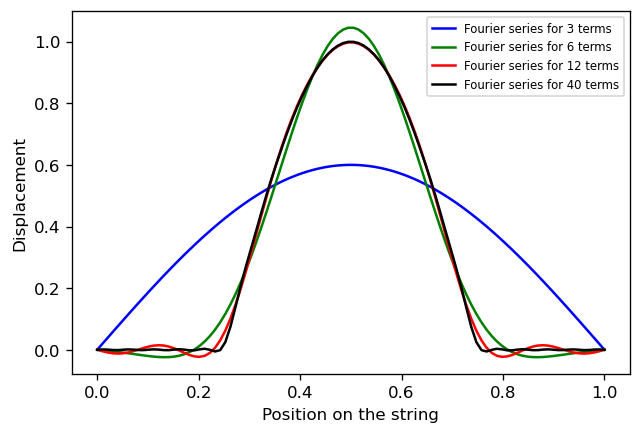

In [18]:
# plotting the static string at t=0 till nth term, as n increases, we get more accurate string profile
nterms = [3,6,12,40]
colors=['blue', 'green', 'red', 'black']
for t,c in zip(nterms, colors):
    four_sum(x, terms=t, return_plot=True, color=c)
    plt.legend(fontsize=7)

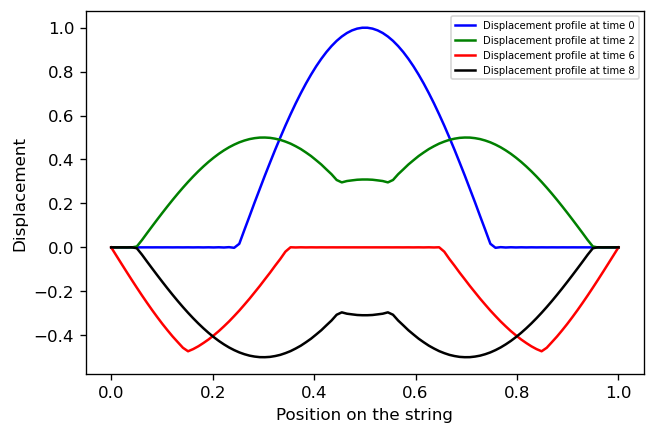

In [19]:
# plotting the displacement profile for varying time, 100 terms
times= [0, 2, 6, 8]
for t,c in zip(times, colors):
    four_sum(x, t=t, return_tplot=True, color=c)
    plt.legend(fontsize=6)

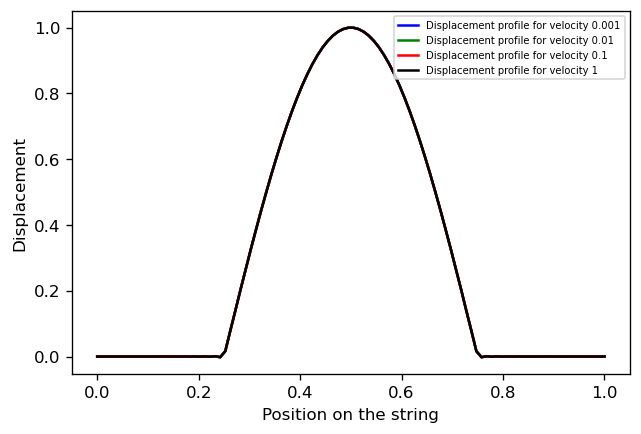

In [20]:
# plotting the displacement profile for varying velocity, 100 terms, t = 7
velocity = [0.001, 0.01, 0.1, 1]
for v,c in zip(velocity, colors):
    four_sum(x, t=0, v_p =v, return_vplot=True, color=c)
    plt.legend(loc='upper right', fontsize=6)

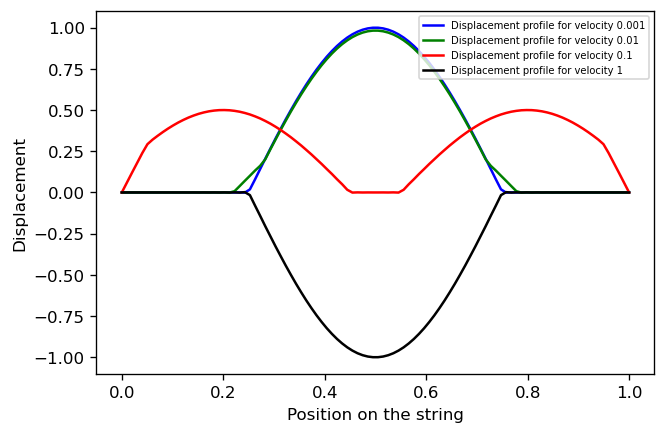

In [21]:
# plotting the displacement profile for varying velocity, 100 terms, t = 7
velocity = [0.001, 0.01, 0.1, 1]
for v,c in zip(velocity, colors):
    four_sum(x, t=3, v_p =v, return_vplot=True, color=c)
    plt.legend(loc='upper right', fontsize=6)

In [22]:
# u[][] is 2D array that contains solutions at different positions and time
# u[i][j] describes the position of the jth point x[j] at the ith time step t[i].
u = np.zeros((len(time), len(x)))

# we fill this array with results from the four_sum function, we now pass the value of time argument
for i in range(len(time)):
    u[i] = four_sum(x, t=time[i])

In [23]:
# function to return an animation for the 2D array u[i][j], we pass some default parameters
def animate(array, save_animation=False, save_name='video.mp4', save_dpi=300):
    
    # defining figure and axes
    fig, ax = plt.subplots()
    
    # we define an empty plot which will be changing throughout 
    graph, = ax.plot([], [], color='black', lw=3)
    
    # initialize the plot
    def init():
        
        # set the x and y limits
        ax.set_xlim(0,1)
        ax.set_ylim(-1,1)
        
        # removing all the axes as we are simulating the displacement of string over positions in its length
        ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
        
        return ax
    
    # frame is the frame number
    def animate(frame):
        
        # we get the strings position data at every time step
        ydata = array[frame]
        
        # plot the position against displacement at the time step defined above
        graph.set_data(x,ydata)
        return graph
    
    # the animate function with the frame number, this gives the animation
    ani = FuncAnimation(fig, animate, init_func=init, blit=True, frames=1000, interval=20, repeat=True)
    
    # return the animation
    return ani

<IPython.core.display.Javascript object>


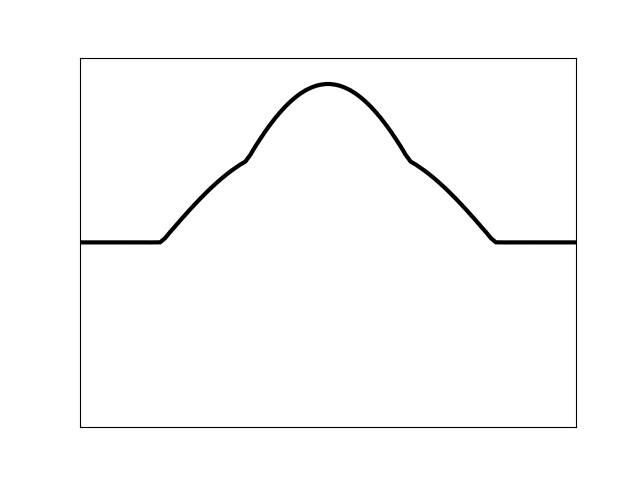

In [24]:
# we utilize feature of jupyter to embed animation here and call our animate function
%matplotlib notebook
animate(u)